# K-means clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.io import loadmat
%matplotlib inline

In [3]:
data = loadmat('data/ex7data2.mat')
X = data['X']
X.shape

(300, 2)

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

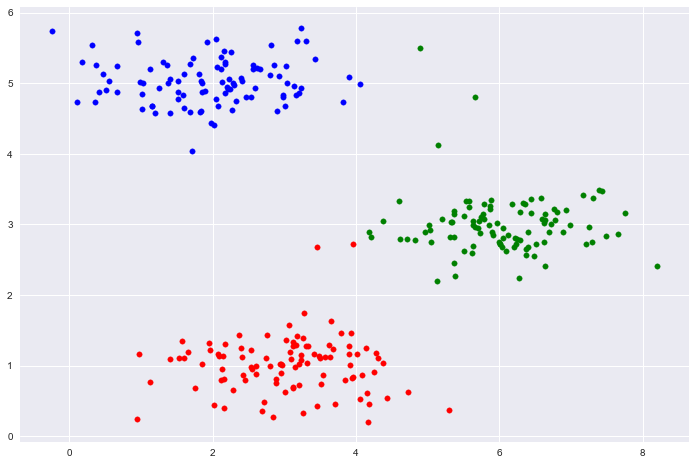

In [11]:
cluster1 = X[kmeans.labels_ == 0, :]
cluster2 = X[kmeans.labels_ == 1, :]
cluster3 = X[kmeans.labels_ == 2, :]

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(cluster1[:, 0], cluster1[:, 1], s = 30, c = 'r', label = 'Cluster 1')
ax.scatter(cluster2[:, 0], cluster2[:, 1], s = 30, c = 'blue', label = 'Cluster 2')
ax.scatter(cluster3[:, 0], cluster3[:, 1], s = 30, c = 'green', label = 'Cluster 3')

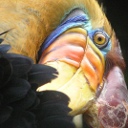

In [12]:
from IPython.display import Image
Image(filename = 'data/bird_small.png')

In [13]:
image_data = loadmat('data/bird_small.mat')
image_data

{'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ..., 
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ..., 
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ..., 
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ..., 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ..., 
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ..., 
         [ 80,  38,  40],
         [ 68,  39,  40],
         [ 59,  43,  42]],
 
        [[ 15,  19,  19],
         [ 20,  20,  18],
         [ 18,  19,  17],
         ..., 
         [ 65,  43

In [14]:
A = image_data['A']
A.shape

(128, 128, 3)

In [17]:
A = A/255.

X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))
X.shape

(16384, 3)

In [19]:
X[0:3, :]

array([[ 0.85882353,  0.70588235,  0.40392157],
       [ 0.90196078,  0.7254902 ,  0.45490196],
       [ 0.88627451,  0.72941176,  0.43137255]])

In [23]:
kmeans2 = KMeans(n_clusters=16)
kmeans2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=16, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [28]:
X_recovered = kmeans2.cluster_centers_[kmeans2.labels_]
X_recovered.shape

(16384, 3)

In [30]:
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
X_recovered.shape

(128, 128, 3)

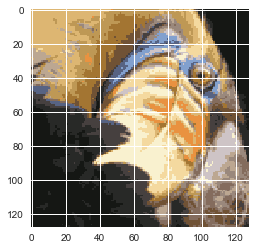

In [31]:
plt.imshow(X_recovered)

# Principle component analysis

In [32]:
data = loadmat('data/ex7data1.mat')
data

{'X': array([[ 3.38156267,  3.38911268],
        [ 4.52787538,  5.8541781 ],
        [ 2.65568187,  4.41199472],
        [ 2.76523467,  3.71541365],
        [ 2.84656011,  4.17550645],
        [ 3.89067196,  6.48838087],
        [ 3.47580524,  3.63284876],
        [ 5.91129845,  6.68076853],
        [ 3.92889397,  5.09844661],
        [ 4.56183537,  5.62329929],
        [ 4.57407171,  5.39765069],
        [ 4.37173356,  5.46116549],
        [ 4.19169388,  4.95469359],
        [ 5.24408518,  4.66148767],
        [ 2.8358402 ,  3.76801716],
        [ 5.63526969,  6.31211438],
        [ 4.68632968,  5.6652411 ],
        [ 2.85051337,  4.62645627],
        [ 5.1101573 ,  7.36319662],
        [ 5.18256377,  4.64650909],
        [ 5.70732809,  6.68103995],
        [ 3.57968458,  4.80278074],
        [ 5.63937773,  6.12043594],
        [ 4.26346851,  4.68942896],
        [ 2.53651693,  3.88449078],
        [ 3.22382902,  4.94255585],
        [ 4.92948801,  5.95501971],
        [ 5.79295774,  

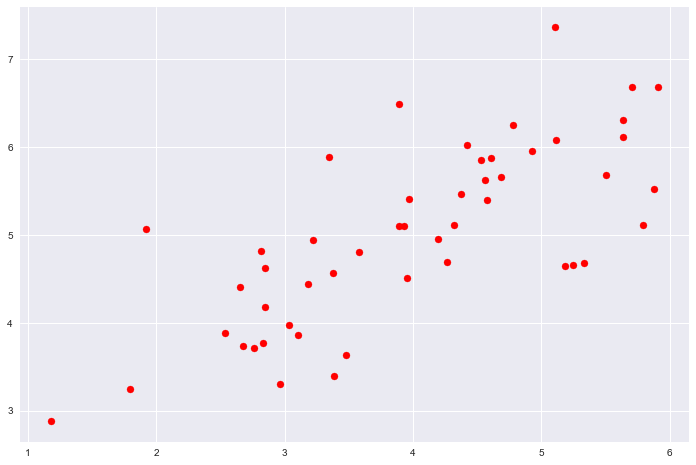

In [33]:
X = data['X']

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X[:, 0], X[:, 1], c = 'r', marker = 'o')

In [37]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components = 1)
Z = pca1.fit_transform(X)
Z.shape

(50, 1)

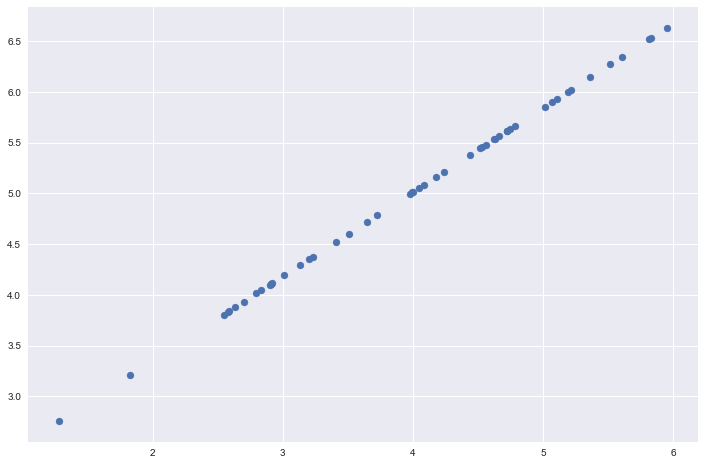

In [41]:
X_recovered = pca1.inverse_transform(Z)

fig, ax = plt.subplots(figsize = (12, 8))
ax.scatter(X_recovered[:, 0], X_recovered[:, 1])

In [42]:
faces = loadmat('data/ex7faces.mat')
X = faces['X']
X.shape

(5000, 1024)

In [43]:
face = np.reshape(X[5, :], (32, 32))

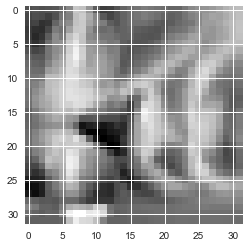

In [44]:
plt.imshow(face)

In [46]:
pca2 = PCA(n_components= 100)
Z = pca2.fit_transform(X)

In [47]:
X_recovered = pca2.inverse_transform(Z)

face_recovered = np.reshape(X_recovered[5, :], (32, 32))

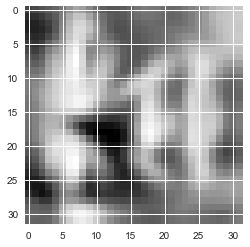

In [48]:
plt.imshow(face_recovered)